<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos_2021/blob/main/Mod_04_class_03_MOL_PFR_REACTOR_jun_15_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
#https://kitchingroup.cheme.cmu.edu/blog/category/animation/
# Carnegie Mellon University
# Pittsburgh, PA

$\frac{\partial C_A}{\partial dt} = -\nu_0 \frac{\partial C_A}{\partial dV} + r_A $

\begin{eqnarray} \frac{dC_0}{dt} &=& 0 \text{ (entrance concentration never changes)} \\ \frac{dC_1}{dt} &=& -\nu_0 \frac{C_1 - C_0}{V_1 - V_0} - k C_1^2 \\ \frac{dC_2}{dt} &=& -\nu_0 \frac{C_2 - C_1}{V_2 - V_1} - k C_2^2 \\ \vdots \\ \frac{dC_4}{dt} &=& -\nu_0 \frac{C_4 - C_3}{V_4 - V_3} - k C_4^2 \end{eqnarray}

In [3]:
Ca0 = 2     # Entering concentration
vo = 2      # volumetric flow rate
volume = 20 # total volume of reactor, spacetime = 10
k = 1       # reaction rate constant

N = 100     # number of points to discretize the reactor volume on

init = np.zeros(N)    # Concentration in reactor at t = 0
init[0] = Ca0         # concentration at entrance

V = np.linspace(0, volume, N) # discretized volume elements
tspan = np.linspace(0, 25)    # time span to integrate over

def method_of_lines(C, t):
    'coupled ODES at each node point'
    D = -vo * np.diff(C) / np.diff(V) - k * C[1:]**2
    return np.concatenate([[0], #C0 is constant at entrance
                            D])

sol = odeint(method_of_lines, init, tspan)

# steady state solution
def pfr(C, V):
    return 1.0 / vo * (-k * C**2)

ssol = odeint(pfr, Ca0, V)

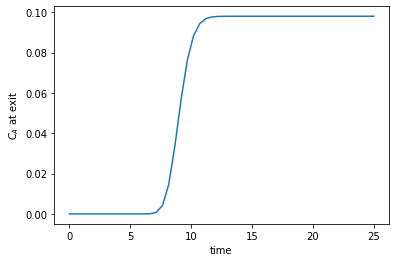

In [4]:

plt.plot(tspan, sol[:, -1])
plt.xlabel('time')
plt.ylabel('$C_A$ at exit')
plt.savefig('transient-pfr-1.png')

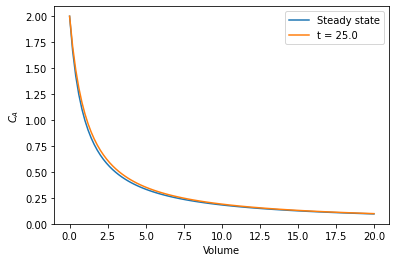

In [5]:
plt.figure()
plt.plot(V, ssol, label='Steady state')
plt.plot(V, sol[-1], label='t = {}'.format(tspan[-1]))
plt.xlabel('Volume')
plt.ylabel('$C_A$')
plt.legend(loc='best')
plt.savefig('transient-pfr-2.png')

In [6]:
Arq = 'transient-pfr-2.png'
from google.colab import files
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>